# Lecture 1: solving ordinary differential equations

This lecture introduces ordinary differential equations, and some techniques for solving first order equations. This notebook uses computer algebra via [Sympy](<http://sympy.org/>) to solve some ODE examples from the lecture notes.

# Importing SymPy

To use Sympy, we first need to import it and call `init_printing()` to get nicely typeset equations:

In [1]:
import sympy
from sympy import symbols, Eq, Derivative, init_printing, Function, dsolve, exp, classify_ode, checkodesol

# This initialises pretty printing
init_printing()
from IPython.display import display

# Support for interactive plots
from ipywidgets import interact

# This command makes plots appear inside the browser window
%matplotlib inline

# Example: car breaking

During braking a car’s velocity is given by $v = v_{0} e^{−t/\tau}$. Calculate the distance travelled.

We first define the symbols in the equation ($t$, $\tau$ and $v_{0}$), and the function ($x$, for the displacement):

In [2]:
t, tau, v0 = symbols("t tau v0")
x = Function("x")

Next, we define the differential equation, and print it to the screen for checking:

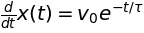

In [3]:
eqn = Eq(Derivative(x(t), t), v0*exp(-t/(tau)))
display(eqn)

The `dsolve` function solves the differential equation symbolically:

In [4]:
x = dsolve(eqn, x(t))
display(x)

where $C_{1}$ is a constant. As expected for a first-order equation, there is one constant.

SymPy is not yet very good at eliminating constants from initial conditions, so we will do this manually assuming that $x = 0$ and $t = 0$:

In [5]:
x = x.subs('C1', v0*tau)
display(x)

Specifying a value for $v_{0}$, we create an interactive plot of $x$ as a function of the parameter $\tau$:

In [6]:
x = x.subs(v0, 100)

#import matplotlib
#import matplotlib.pyplot as plt
#import numpy as np
def plot(τ=1.0):
    x1 = x.subs(tau, τ)

    # Plot position vs time
    sympy.plot(x1.args[1], (t, 0.0, 10.0), xlabel="time", ylabel="position");

interact(plot, τ=(0.0, 10, 0.2));

interactive(children=(FloatSlider(value=1.0, description='τ', max=10.0, step=0.2), Output()), _dom_classes=('widget-interact',))

# Classification

We can ask SymPy to classify our ODE, e.g. show that it is first order):

In [7]:
classify_ode(eqn)

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

# Parachutist

Find the variation of speed with time of a parachutist subject to a drag force of $kv^{2}$.

The equations to solve is

$$
\frac{m}{k} \frac{dv}{dt} = \alpha^{2} - v^{2}
$$

where $m$ is mass, $k$ is a prescribed constant, $v$ is the velocity, $t$ is time and $\alpha^{2} = mg/k$ ($g$ is acceleration due to gravity).

We specify the symbols, unknown function $v$ and the differential equation

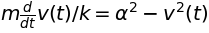

In [8]:
t, m, k, alpha = symbols("t m k alpha")
v = Function("v")
eqn = Eq((m/k)*Derivative(v(t), t), alpha*alpha - v(t)*v(t))
display(eqn)

First, let's classify the ODE:

In [9]:
classify_ode(eqn)

('separable', '1st_power_series', 'lie_group', 'separable_Integral')

We see that it is not linear, but it is separable. Using `dsolve` again,

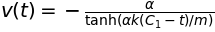

In [10]:
v = dsolve(eqn, v(t))
display(v)

SymPy can verify that an expression is a solution to an ODE:

In [11]:
print("Is v a solution to the ODE: {}".format(checkodesol(eqn, v)))

Is v a solution to the ODE: (True, 0)


Try adding the code to plot velocity $v$ against time $t$.